# Guide to Essential Commands and Functionalities in AEcroscopy


${Yongtao}$ ${Liu}$

${June}$ ${2023}$

Welcome to our comprehensive guide to the AEcroscopy for scanning probe microscopy (SPM). AEcroscopy is a decdicated Python package incorporating a wide range of commands and functions that facilitate basic microscope operations with BEPyAE.exe, enabling users to perform tasks with ease. 

Here, we will introduce you to the essential Python commands and functions available within the AEcroscopy. We will explore their capabilities, syntax, and usage, empowering you to harness the full potential of the AEcroscopy-BEPyAE-SPM system.
Whether you are a seasoned Python developer or new to the world of programming, a experienced SPM users or new to the microscope society, this chapter will serve as a foundation for your journey into the exciting realm of Python-controlled SPM. 

By utilizing AEcroscopy, you will gain the ability to write and execute SPM experiments in Python, revolutionizing the way we perform the microscope experiments.

### Install and Import

First thing first, we need to install and import necessary packages, including AEcroscopy.

In [1]:
import os
import win32com.client
import numpy as np
import time
import h5py
import sidpy
import pyNSID
import matplotlib.pyplot as plt
from tqdm import tqdm

# import acquition.py
from Acquisition_v0_9 import Acquisition   # include the Acquistion_v.py in the same directory

### Start BEPyAE.exe and set VI

Then, we need to start the Python API BEPyAE.exe.
*  Start BEPyAE.exe
*  Set VI of BEPyAE; if this version includes PyScanner, also set VIs for PyScanner

In [2]:
newexp = Acquisition(exe_path = r"C:\Users\yla\Dropbox (ORNL)\My Files\AEcroscopy_BEPyAE\BEPyAE_Labview\BEPyAE 060523 01\BEPyAE.exe")  # exe_path is the directory of BEPyAE; 

### Initialize Igor AR18

Here, we connect BEPyAE with the microscope
* Set offline development. If you are doing offline development, set offline_development=True, otherwise, if you are running microscope measurement, set offline_development=False


Executing $init\_BEPyAE()$ command will also:
* Build a connection between BEPyAE and AR18
* Get parameters in AR18

In [3]:
newexp.init_BEPyAE(offline_development = True) # set offline_development=True if doing offline development
                                               # executing this will also initlize AR18

>##### Hereinafter 
>* if no parameter is input in a function, when you execute the function, it will take the default parameters in BEPyAE.exe
>* Some functions print feedback after execution. This feedback can be turned off by setting feedbackon = False. You can turn off feedback when you include this function in some iterations.
>* Note: Tip locations: -1 is the left handside for x-axis and bottom side for y-axis, 1 is the right handside for x-axis and top side for y-axis

### Set tip parameters
Here, we use $tip\_control()$ function to set setpoint. 


$tip\_control()$ function also allows us to move tip to a specific location [next_x_pos_00, next_y_pos_01], e.g., in the below example, the tip will be moved to locaiton [0.5, 0.5]


![image1.PNG](../python_guide/image1.png)


In [4]:
newexp.tip_control(tip_parms_dict = {"set_point_V_00": 1, "next_x_pos_00": 0.5, "next_y_pos_01": 0.5},
                   do_move_tip = True, 
                   do_set_setpoint = True,
                   feedbackon=False) # Executing this code will set setpoint to 1 V, 
                                     # and move tip to location [0.5, 0.5]

### Set IO
In order for the Python code to provide the correct commands, it is essential to provide the hardware components (e.g., AFM platform, voltage amplifiers, channel data, etc.) involved in our experiment. Thus, here we set information about hardwares with function $define\_io\_cluster()$.

In [5]:
newexp.define_io_cluster(IO_cluster_parms_dict = {"analog_output_amplifier_06": 1, 
                                                  "channel_01_type_07": 1, 
                                                  "channel_02_type_08": 2,
                                                  "channel_03_type_09": 3})

('0 Cypher AR18',
 '6124',
 4000000.0,
 10.0,
 10.0,
 'AC and DC on AO0',
 1.0,
 'none',
 'none',
 'none',
 'external')

------------------------------------------------------------------------------------------
                                          BEPFM Measurement

### Set BE pulse parameters
One of the most popular experiment we can perform with AEcroscopy-BEPyAE.exe is the band excition (BE) piezoresponse force microscopy experiments. Here we use $define\_be\_parms()$ to set BE pulse parameters.

In [6]:
# set BE parameters
newexp.define_be_parms(be_parms_dict = {"center_frequency_Hz_00": 335, "band_width_Hz_01": 100,
                                       "amplitude_V_02": 1, "phase_variation_03": 1,
                                       "repeats_04": 4, "req_pulse_duration_s_05": 4,
                                       "auto_smooth_ring_06": 1}, 
                      do_create_be_waveform = True, feedbackon=False)

### BE Line scan

After setting BE pulse parameters, we can start to do BE line measurement with the function $do\_line\_scan()$. In this function, we will need to provide the BE line scan pixel (i.e., num_BE_Pulses_01) and BE line scan locations (i.e. start location and stop location). 

Note that
* This fucntion is just a single BE line scan, not a raster image
* This fucntion returns 5 datasets: quick_fitting, complex spectra, and 3 channel data

In [7]:
# Do a single line scan
qk_fit, com_spec, chn1, chn2, chn3 = newexp.do_line_scan(line_scan_parms_dict = {"num_BE_pulses_01": 32,
                                                                                 "start_x_pos_00": -0.5, "start_y_pos_01": 0,
                                                                                 "stop_x_pos_02": 0.5, "stop_y_pos_03": 0},
                                                         upload_to_daq = True, do_line_scan = True)

voltage offset and number of BE pulse are:  (0.0, 32)
line scan start and end positions:  (-0.5, 0.0, 0.5, 0.0)


### BE Raster Scan
We can also perform a square raster scan BE measurement using the function $raster\_scan()$. In this function, we need to provide the raster scan pixel (i.e., $scan\_pixel$) and scan region (i.e., scan start and stop points).


Note that
* raster_scan returns 3 sidpy datasets: BEPFM quick fitting, channels, and BE complex spectra
* raster_scan also saves these 3 sidpy dataset in a h5 file named $file\_name$

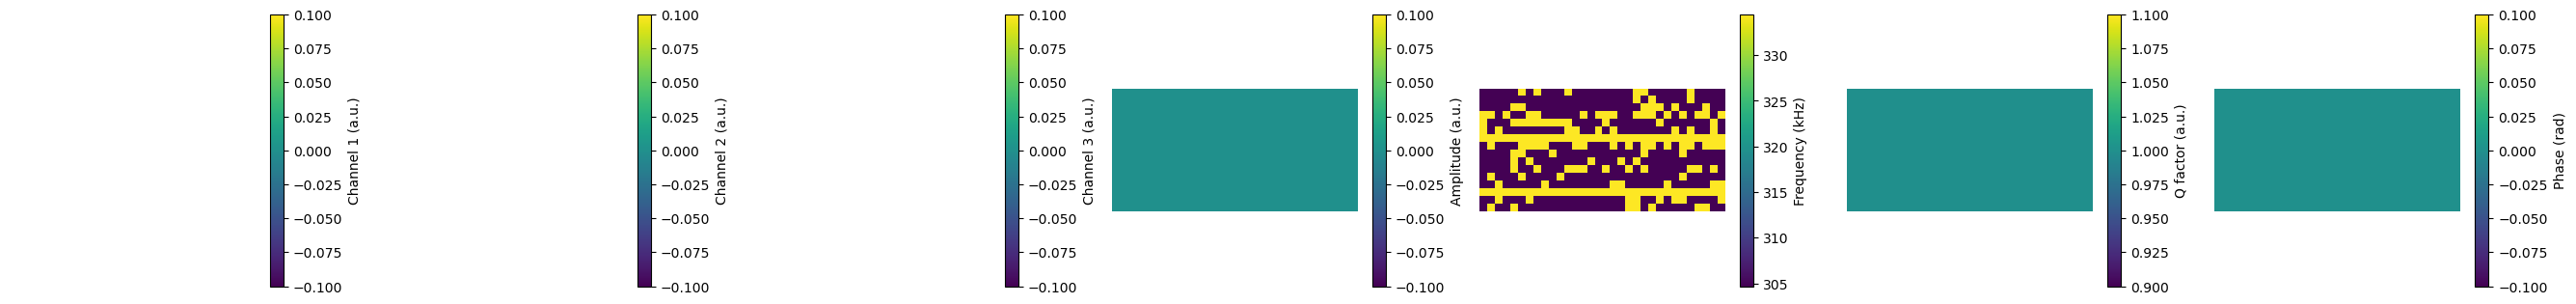

 [progress: 0:00:23] |*****************                     | (ETA:   0:00:26) 

 [progress: 0:00:24] |*******************                   | (ETA:   0:00:24) 

KeyboardInterrupt: 

In [8]:
# Do a 64*64 raster scan
dset_pfm, dset_chns, dset_cs = newexp.raster_scan(raster_parms_dict = {"scan_pixel": 32, "scan_x_start": -0.8,
                                                                       "scan_y_start": -0.8,"scan_x_stop": 0.8,
                                                                       "scan_y_stop": 0.8}, file_name = "test")

# if you see below error, check if you set IO channels manually---this has to be done manually now
 ### TypeError: When specifying values over which a parameter is varied, values should not be an empty array

#### BE Raster Scan Results

We can visualize BE raster scan results inlcuding quick fitting images and channel images.

sidpy.Dataset of type IMAGE_STACK with:
 dask.array<array, shape=(32, 32, 5), dtype=float64, chunksize=(32, 32, 5), chunktype=numpy.ndarray>
 data contains: quick fit pfm (generic)
 and Dimensions: 
y axis:  y axis (m) of size (32,)
x axis:  x axis (m) of size (32,)
BE responses:  channels (generic) of size (5,)


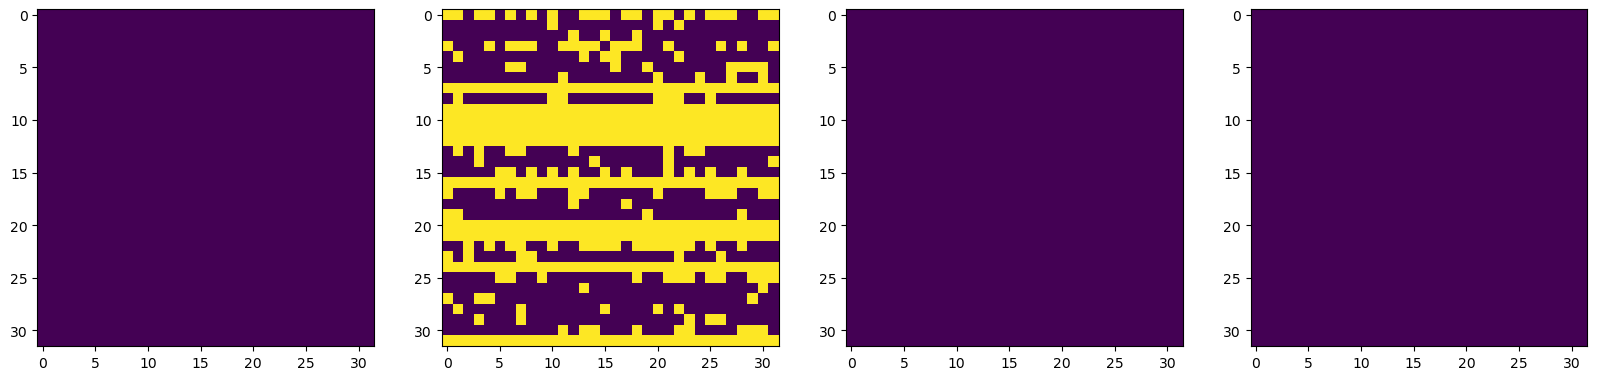

In [9]:
# Quick fit BE images
print(dset_pfm)  # sidpy dataset of BE quick fit

# plot BEPFM quick fit data
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 5), dpi = 100)
ax1.imshow(dset_pfm[:,:,0])
ax2.imshow(dset_pfm[:,:,1])
ax3.imshow(dset_pfm[:,:,2])
ax4.imshow(dset_pfm[:,:,3])

sidpy.Dataset of type IMAGE_STACK with:
 dask.array<array, shape=(3, 32, 32, 1), dtype=float64, chunksize=(3, 32, 32, 1), chunktype=numpy.ndarray>
 data contains: channels (generic)
 and Dimensions: 
y axis:  y axis (m) of size (3,)
x axis:  x axis (m) of size (32,)
channels images:  channels (generic) of size (32,)
d:  generic (generic) of size (1,)


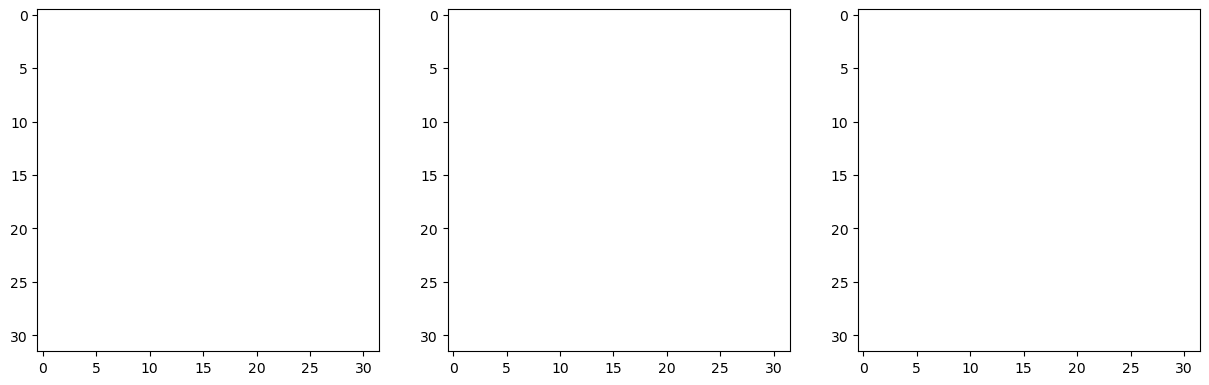

In [10]:
# Channel images
print(dset_chns)  # sidpy dataset of channels

# plot channel data
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5), dpi = 100)
ax1.imshow(dset_chns[0,:,:])
ax2.imshow(dset_chns[1,:,:])
ax3.imshow(dset_chns[2,:,:])

In [11]:
# sidpy dataset of complex spectra
dset_cs

sidpy.Dataset of type UNKNOWN with:
 dask.array<array, shape=(32, 32, 62), dtype=complex128, chunksize=(32, 32, 62), chunktype=numpy.ndarray>
 data contains: pfm complex spectra (V)
 and Dimensions: 
location index y:  index (generic) of size (32,)
location index x:  index (Hz) of size (32,)
c:  generic (generic) of size (62,)

We can also load the saved h5 file and analyze it after experiments

In [12]:
hf = h5py.File('test_0.hf5', 'r+')
sidpy.hdf.hdf_utils.print_tree(hf)

/
├ BE Channels
  -----------
  ├ Channels
    --------
    ├ Channels
    ├ channels images
    ├ d
    ├ x axis
    ├ y axis
├ BE Complex Spectra
  ------------------
  ├ Complex Spectra
    ---------------
    ├ Complex Spectra
    ├ c
    ├ location index x
    ├ location index y
├ BE Parameters
  -------------
  ├ frequency
  ├ pulse parameters
  ├ scan size
├ BE Quick Fitting
  ----------------
  ├ Quick Fitting
    -------------
    ├ BE responses
    ├ Quick Fitting
    ├ x axis
    ├ y axis


In [13]:
be = hf["BE Quick Fitting/Quick Fitting/Quick Fitting"]

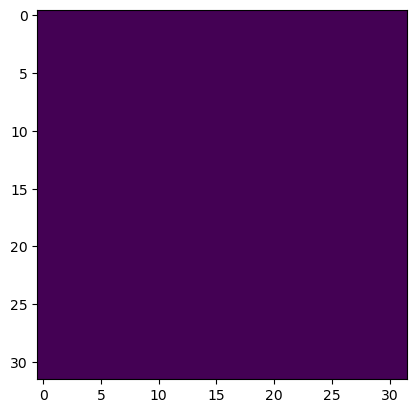

In [14]:
be = np.asarray(be)
plt.imshow(be[:,:,0])

------------------------------------------------------------------------------------------
                                          BEPS Measurements


### Set BEPS parameters
In addition to BE piezoresponce force microscopy image measurement, we can also do BE piezoresponse spectroscopy (BEPS) measurement with the function $do\_BEPS\_xxx()$. 

However, before doing BEPS measurement, we first need to define BEPS measurement parameters with the function $define\_BEPS\_parameters()$. In this function, we need to provide BEPS wavefrom parameters, such as amplitude, steps, cycle numbers, etc. 

In [15]:
# Define BEPS parameters
newexp.define_BEPS_parameters(beps_parms_dict = {"amplitude_V_00": 8, "offset_V_01":0, 
                                                 "read_voltage_V_02": 0, "step_per_cycle_03": 32, 
                                                 "num_cycles_04": 3, "cycle_fraction_05": 0,
                                                 "cycle_phase_shift_06": 0, "measure_loops_07": 0, 
                                                 "transition_time_s_08": 1E-3, "delay_after_step_s_09": 0},
                             do_create_waveform = True)

BEPS parameters are:  (8.0, 0.0, 0.0, 32, 3, 0, 0, 0, 0.001, 0.0, 0.0, 0.0, 1, 0, 8.0, 8.0, 7.0, -7.0, False, False, False)


### Do grid BEPS
After defining BEPS parameters, we can execute $do\_BEPS\_grid()$ function to perform a BEPS measurement. In the $do\_BEPS\_grid()$ function, we can provide grid pixel number in $beps\_grid\_parms\_dict()$

In [16]:
# do BEPS
beps_waveform, beps_quick_fit, beps_cx, beps_chns = newexp.do_beps_grid(beps_grid_parms_dict = {"pixel_num_x": 5, 
                                                                                                "pixel_num_y": 5},
                                                                       file_name = "BEPS_grid")

 [progress: 0:00:39] |************************************  | (ETA:   0:00:01) C:\Users\yla\AppData\Local\anaconda3\lib\site-packages\pyNSID\io\hdf_utils.py:376: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',
C:\Users\yla\AppData\Local\anaconda3\lib\site-packages\pyNSID\io\hdf_utils.py:376: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',
C:\Users\yla\AppData\Local\anaconda3\lib\site-packages\pyNSID\io\hdf_utils.py:376: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',


Plot the BEPS waveform used in the experiments.

Text(0.5, 0, 'Step')

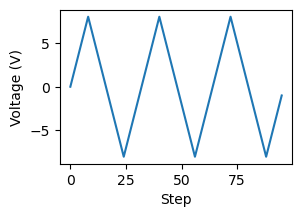

In [17]:
f, ax = plt.subplots(figsize = (3, 2))
ax.plot(beps_waveform)
ax.set_ylabel("Voltage (V)")
ax.set_xlabel("Step")

Druing experiments, BEPS loops can be visualized in $BEPyAE.exe$. After experiments, we can also plot all BEPS loops as below.

Text(0, 0.5, 'Phase (rad)')

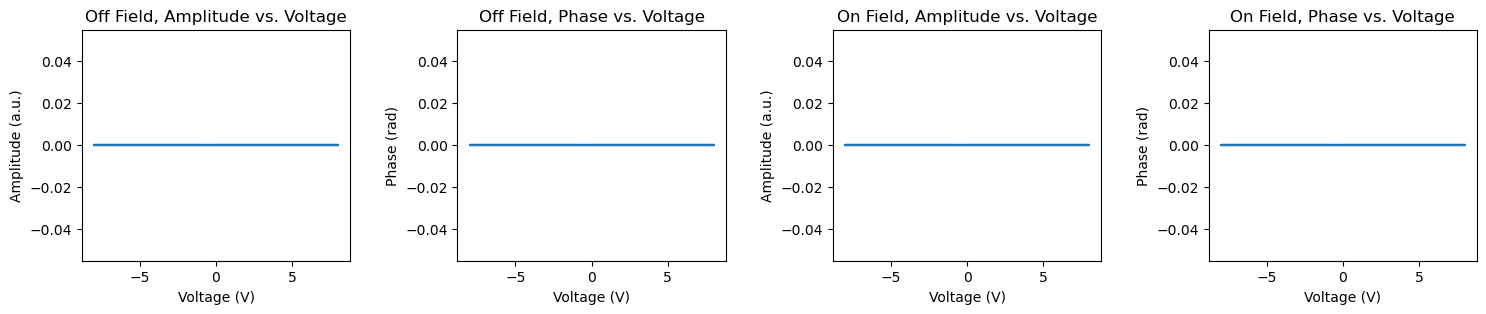

In [18]:
# convert sidpy dataset to numpy array
quick_fit = np.asarray(beps_quick_fit)

# if measure_loops_07 is on and off, we need to seperate on field and off field responses.
on_field_quick_fit = np.zeros((quick_fit.shape[0], quick_fit.shape[1], len(beps_waveform)))
off_field_quick_fit = np.zeros((quick_fit.shape[0], quick_fit.shape[1], len(beps_waveform)))
for i in range (len(beps_waveform)):
    on_field_quick_fit[:,:,i] = quick_fit[:,:,2*i]
    off_field_quick_fit[:,:,i] = quick_fit[:,:,1+2*i]
    
###### Plot on field and off responses ######
idx = 0  # index of the loop to plot
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (18, 3), dpi = 100)
f.subplots_adjust(wspace = 0.4)
ax1.set_title("Off Field, Amplitude vs. Voltage")
ax1.plot(beps_waveform, off_field_quick_fit[idx, 0, ])  
ax1.set_xlabel("Voltage (V)")
ax1.set_ylabel("Amplitude (a.u.)")

ax2.set_title("Off Field, Phase vs. Voltage")
ax2.plot(beps_waveform, off_field_quick_fit[idx, 3, ])  
ax2.set_xlabel("Voltage (V)")
ax2.set_ylabel("Phase (rad)")

ax3.set_title("On Field, Amplitude vs. Voltage")
ax3.plot(beps_waveform, on_field_quick_fit[idx, 0, ])  
ax3.set_xlabel("Voltage (V)")
ax3.set_ylabel("Amplitude (a.u.)")

ax4.set_title("On Field, Phase vs. Voltage")
ax4.plot(beps_waveform, on_field_quick_fit[idx, 3, ])  
ax4.set_xlabel("Voltage (V)")
ax4.set_ylabel("Phase (rad)")

### Do BEPS at a specific locations

In addition to BEPS measurement at grid locations, the $do\_BEPS\_specific()$ function also enables BEPS measurement at specified locations by providing specified coordinates to $coordinates$

In [ ]:
# do BEPS at specific locations
beps_waveform, beps_quick_fit, beps_cx, beps_chns = newexp.do_beps_specific(coordinates = np.asarray([0.5, 0.5]),
                                                                            file_name = "BEPS_at_specific_location")

However, when you want to want to measure a feature observed in an image, you often need to convert the location from the image to the coordiante for tip. Here we can use the $convert\_coordinates()$ function.

In [21]:
# e.g. convert the location [100, 130] at an image to the coordinate of tip.
locations = np.asarray([100, 130])
converted_coor = newexp.convert_coordinates(original_coordinates = locations, num_pix_x = 256, num_pix_y = 256)
print(converted_coor)

[-0.21875   0.015625]


After we have the coordiante for tip location, we can use the $do\_BEPS\_specific()$ to perform BEPS measurement here

In [22]:
# do BEPS at specific locations
beps_waveform, beps_quick_fit, beps_cx, beps_chns = newexp.do_beps_specific(coordinates = converted_coor,
                                                                            file_name = "BEPS_at_specific_location")

 [progress: 0:00:01] |                                      | (ETA:  --:--:--) C:\Users\yla\AppData\Local\anaconda3\lib\site-packages\pyNSID\io\hdf_utils.py:376: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',
C:\Users\yla\AppData\Local\anaconda3\lib\site-packages\pyNSID\io\hdf_utils.py:376: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',
C:\Users\yla\AppData\Local\anaconda3\lib\site-packages\pyNSID\io\hdf_utils.py:376: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',


------------------------------------------------------------------------------------------
                                         

### Apply a pulse

In addition to characterization, SPM also allows to manipulate objects. For example, applying a DC pulse via SPM tip to a ferroelectric film allows to flip the ferroelectric polarization. 

In AEcroscopy, we can apply a pulse by using $define\_apply\_pulse()$ function. We can set the pulse amplitude and pulse duration in this function, as shown below.

Text(0, 0.5, 'Voltage (V)')

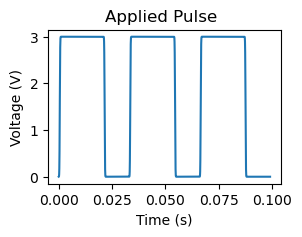

In [23]:
# Apply DC pulse
pulse, time = newexp.define_apply_pulse(pulse_parms_dict = {"pulse_init_amplitude_V_00": 0, "pulse_mid_amplitude_V_01": 3,
                                                            "pulse_final_amplitude_V_02": 0, "pulse_on_duration_s_03": 20E-3,
                                                            "rise_time_s_05": 1E-3, "pulse_final_duration_s_04": 10E-3,
                                                            "pulse_repeats_06": 3}, 
                                        do_create_pulse = True, do_upload_pulse = True, do_apply_pulse = False)
# Plot applied pulse
f, ax = plt.subplots(figsize = (3, 2))
f.suptitle("Applied Pulse")
ax.plot(time, pulse)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Voltage (V)")

### Progress bar

AEcroscopy is designed for automated and autonomous microscopy measurements, so we also include a progress function $progress\_bar()$ that assists users to track the experiment progress. For example, when we perform 5 iterations BEPS measurement, we can use the progress bar to track the experiment progress as below. 

In [24]:
iteration = 5
progress_bar = newexp.progress_bar(max_value = iteration)
for i in range (iteration):
    newexp.define_BEPS_parameters(do_VS_waveform = True, feedbackon = False)
    progress_bar.update(i)

 [progress: 0:00:02] |******************************        | (ETA:   0:00:00) 

------------------------------------------------------------------------------------------------
                                         Capability with FPGA

In AEcroscopy-BEPyAE.exe system, users have various options of scan trajectories when equiped with FPGA, such as sprial scan or any customized trajectories.

### Spiral Scan

Here we will show how to do spiral scan with the $fpga\_spiral\_scan()$ function. Using this function, we set the spiral parameters, e.g., inner radius, outer radius, spiral cycles, duration, etc; the function will return the spiral result and save the result as a H5 file. 

In [25]:
sprial_results = newexp.fpga_spiral_scan(spiral_parms_dict = {"spiral_inner_radius_x_V_00": 0, "spiral_outer_radius_x_V_01": 2,
                                                              "spiral_inner_radius_y_V_02": 0, "spiral_outer_radius_y_V_03": 2,
                                                              "spiral_N_cycles_04": 5, "spiral_duration_05": 5,
                                                              "spiral_dose_distribution_06": 1, "spiral_direction_07": 0,
                                                              "spiral_return_opt_08": 0, "scan_x_offset_V": 0, 
                                                              "scan_y_offset_V": 0, "scan_rotation_deg": 0},
                                         do_scan_update = True, do_scan = True,
                                         file_name = "spiral_scan")

### BE Spiral Scan

If we apply BE excitation waveform during spiral scan, we can also perform BE spiral measurement. The function to perform BE spiral measurement is $fpga\_spiral\_scan\_BE()$. The BE waveform parameters can be set either in this function or beforehand. 

In [30]:
# set BE parameters, set spiral parameters, and do spiral BE
fpga_results, be_results = newexp.fpga_spiral_scan_BE(be_parms_dict = {"center_frequency_Hz_00": 335, "band_width_Hz_01": 100,
                                                                       "amplitude_V_02": 1, "phase_variation_03": 1,
                                                                       "repeats_04": 4, "req_pulse_duration_s_05": 4},
                                                      do_create_be_waveform = True,
                                                      spiral_parms_dict = {"spiral_inner_radius_x_V_00": 0, 
                                                                           "spiral_outer_radius_x_V_01": 0.5,
                                                                           "spiral_inner_radius_y_V_02": 0, 
                                                                           "spiral_outer_radius_y_V_03": 0.5,
                                                                           "spiral_N_cycles_04": 10},
                                                      num_BE_pulse = 128, do_scan_update = True, do_BE_arb_line_update_00 = True,
                                                      do_BE_arb_line_scan_01 = True, spiral_reconstruction = False)

BE parameters are:  (335000.0, 100000.0, 1.0, 1.0, 4, 0.004, 1, 3352.2952763920002, 0.12159459061880915)


### Tip Control by FPGA
FPGA can also drive the probe to a specific location with the function $fpga\_tip\_control()$. We need to input the tip location parameters when using this function, as shown below, executing the below command will move tip from [0, 0] to [0.5, 0.5].

In [31]:
newexp.fpga_tip_control(fpga_tip_parms_dict={"strat_x_position_V_00": 0, "strat_y_position_V_01": 0,
                                             "final_x_position_V_02": 0.5, "final_y_position_V_03": 0.5},
                        make_cur_pos_start_pos=False, do_probe_move_update=True, do_probe_move=True)

If we are moving the tip from current location, we can set the $make\_cur\_pos\_start\_pos = True$ and provide the final location, as shown below.

In [32]:
newexp.fpga_tip_control(fpga_tip_parms_dict={"final_x_position_V_02": 0.5, "final_y_position_V_03": 0.5},
                        make_cur_pos_start_pos=True, do_probe_move_update=True, do_probe_move=True)

### FPGA Driven Line by Line Raster Scan

We can also use $fpga\_linebyline\_raster\_scan()$ function to perform slow raster scan or line by line scan. 
* when we set $do\_full\_raster\_scan = True$, $wait\_to\_advance\_to\_next\_line = False$, and $do\_next\_raster\_line\_only = False$, this function can be used to perform a full raster scan, as shown below. 

In [33]:
raster_full = newexp.fpga_linebyline_raster_scan(line_by_line_raster_dict = {"raster_scan_size_x_V_00": 1, 
                                                                             "raster_scan_size_y_V_01": 1, 
                                                                             "raster_N_scan_lines_02": 64, 
                                                                             "raster_line_duration_s_03": 1,
                                                                             "scan_x_offset_V_04": 0, 
                                                                             "scan_y_offset_V_05": 0,
                                                                             "scan_rotation_deg_06": 0}, 
                                                 initialize_line_by_line_raster=True, do_full_raster_scan=True, 
                                                 wait_to_advance_to_next_line=False, do_next_raster_line_only=False,
                                                 stop_full_raster_scan=False)

* Alternatively, when we set $do\_full\_raster\_scan = False$, $wait\_to\_advance\_to\_next\_line = True$, and $do\_next\_raster\_line\_only = True$, this function can be used to perform scan line by line, as shown below. 

In [35]:
raster_line = newexp.fpga_linebyline_raster_scan(line_by_line_raster_dict = {"raster_scan_size_x_V_00": 1, 
                                                                             "raster_scan_size_y_V_01": 1, 
                                                                             "raster_N_scan_lines_02": 64, 
                                                                             "raster_line_duration_s_03": 1,
                                                                             "scan_x_offset_V_04": 0, 
                                                                             "scan_y_offset_V_05": 0,
                                                                             "scan_rotation_deg_06": 0}, 
                                                 initialize_line_by_line_raster=True, do_full_raster_scan=False, 
                                                 wait_to_advance_to_next_line=True, do_next_raster_line_only=True,
                                                 stop_full_raster_scan=False)